In [86]:
import re
import scipy.io
from scipy.optimize import minimize
from scipy.stats import multivariate_normal
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
data_1_dict = scipy.io.loadmat('ex8data1.mat')

X = data_1_dict['X']
X_val = data_1_dict['Xval']
y_val = data_1_dict['yval'].T[0]

M = len(X)
M_val = len(X_val)

## Plotting Data

(0, 30)

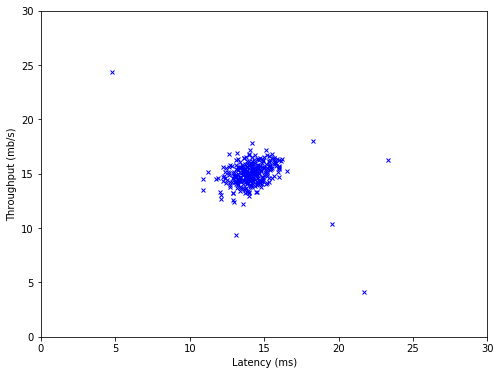

In [88]:
plt.figure(figsize=(8, 6))
plt.plot(X.T[0], X.T[1], 'bx', ms=4)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.xlim(0, 30)
plt.ylim(0, 30)

## Gaussian Distributioni

In [89]:
def estimateGaussian(X):
    """
     This function estimates the parameters of a Gaussian distribution using the data in X
    """
    
    m = X.shape[0]
    
    #compute mean
    sum_ = np.sum(X,axis=0)
    mu = 1/m *sum_
    
    # compute variance
    var = 1/m * np.sum((X - mu)**2,axis=0)
    
    return mu,var

In [90]:
mu, var = estimateGaussian(X)

In [91]:
rv = multivariate_normal(mu, np.diag(var))

In [92]:
xs, ys = np.mgrid[0:30:0.1, 0:30:0.1]
pos = np.empty(xs.shape + (2,))
pos[:, :, 0] = xs
pos[:, :, 1] = ys

## Visualize the fit

(0, 30)

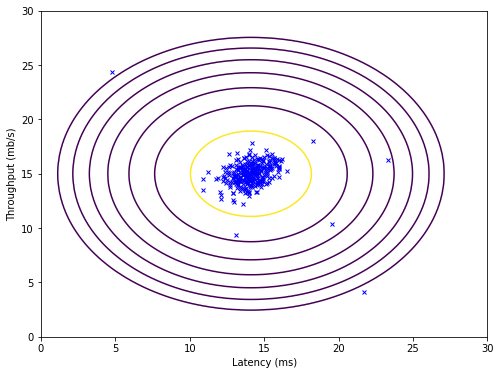

In [93]:
plt.figure(figsize=(8, 6))
plt.plot(X.T[0], X.T[1], 'bx', ms=4)
plt.contour(xs, ys, rv.pdf(pos), 10.**np.arange(-21, -2, 3))
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.xlim(0, 30)
plt.ylim(0, 30)

## Selecting the threshold $\epsilon$

In [94]:
p_val = rv.pdf(X_val)

In [95]:
def selectThreshold(y_val, p_val):
    """
    Find the best threshold (epsilon) to use for selecting outliers
    """
    
    best_epsilon, best_F1 = 0, 0
    
    step_size = (max(p_val) - min(p_val)) / 1000
    for epsilon in np.arange(min(p_val), max(p_val), step_size)[1:]:
        cv_predictions = p_val < epsilon
        
        tp = np.sum((cv_predictions == 1) & (y_val == 1))
        fp = np.sum((cv_predictions == 1) & (y_val == 0))
        fn = np.sum((cv_predictions == 0) & (y_val == 1))
        tn = np.sum((cv_predictions == 0) & (y_val == 0))
                
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        
        F1 = 2 * prec * rec / (prec + rec)
           
        if F1 > best_F1:
            best_epsilon = epsilon
            best_F1 = F1            
        
    return best_epsilon, best_F1

In [96]:
best_epsilon, best_F1 = selectThreshold(y_val, p_val)
print("Best epsilon found using cross-validation:", best_epsilon)
print("Best F1 on Cross Validation Set:", best_F1)

Best epsilon found using cross-validation: 8.990852779269493e-05
Best F1 on Cross Validation Set: 0.8750000000000001


## Visualize the anomalies

Text(0, 0.5, 'Throughput (mb/s)')

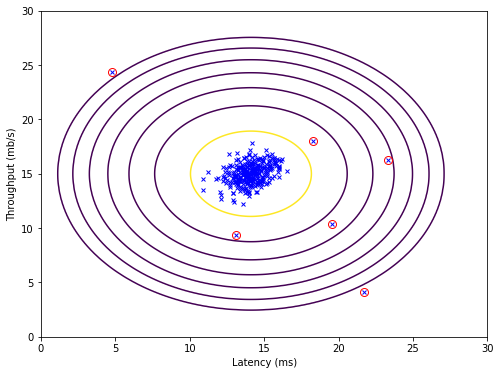

In [97]:
plt.figure(figsize=(8,6))

# plot the data
plt.plot(X.T[0], X.T[1], 'bx', ms=4)

# potting of contour
plt.contour(xs, ys, rv.pdf(pos), 10.**np.arange(-21, -2, 3))

# Circling of anomalies
outliers = X[rv.pdf(X) < best_epsilon]
plt.plot(outliers.T[0], outliers.T[1], 'ro', ms=8, mfc='none', mec='r')

plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

## High Dimensional Datase

In [98]:
data_2_dict = scipy.io.loadmat('ex8data2.mat')

X = data_2_dict['X']
X_val = data_2_dict['Xval']
y_val = data_2_dict['yval'].T[0]

M = len(X)
M_val = len(X_val)

In [99]:
# compute the mean and variance
mu, var = estimateGaussian(X)

In [100]:
# Training set
rv = multivariate_normal(mu, np.diag(var))

# cross-validation set
p_val = rv.pdf(X_val)

# Find the best threshold
best_epsilon, best_F1 = selectThreshold(y_val, p_val)

outliers = X[rv.pdf(X) < best_epsilon]

print("Best epsilon found using cross-validation:", best_epsilon)
print("Best F1 on Cross Validation Set:", best_F1)
print("Number of Outliers found:", len(outliers))

Best epsilon found using cross-validation: 1.3772288907613604e-18
Best F1 on Cross Validation Set: 0.6153846153846154
Number of Outliers found: 117
